| ![nsdf](https://www.sci.utah.edu/~pascucci/public/visoar-logo-tight.png)  | [ViSOAR](http://visoar.com/) [Jupyter notebook](https://jupyter.org/) <br> created by  [Valerio Pascucci](http://cedmav.com/) and  [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)  |  
|---|:---:|


# Distribution of the data related by the following book chapter: 

### Cahpter 1.18 - Retinal Connectomics 

__Authors:__  _[Bryan W. Jones](http://marclab.org/outreach/people/bryan-w-jones/), and [Robert E. Marc.](https://marclab.org/outreach/people/robert-e-marc/)_ 

__Published in:__  The Senses: A Comprehensive Reference, Elsevier, 2nd Edition - September 8, 2020, Pages 320-343, ISBN  9780128054086

https://www.elsevier.com/books/the-senses-a-comprehensive-reference/fritzsch/978-0-12-805408-6


#  <center> This is a preview of the 6.4 TB of EM data
![Connectomics EM Data](https://www.sci.utah.edu/~pascucci/public/RabbitRetinaEM.gif)

### <center>  Import modules and install them if missing. Check print message to see if the kernel should be restarted.

In [1]:
# import os,sys
# def restartkernel() :
#     display_html('''<script>Jupyter.notebook.kernel.restart(); 
#     //setTimeout(function(){IPython.notebook.execute_all_cells();
#     }, 100)</script>''',raw=True)

# try:
#     import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk
#     if pk.version.parse(gv.get_module_version(ov)[0]) < pk.version.parse("2.1.184"):
#         !"{sys.executable}" -m pip install matplotlib scikit-image getversion packaging --upgrade OpenVisus 
#         restartkernel()
# except:
#     !"{sys.executable}" -m pip install matplotlib scikit-image getversion packaging --upgrade OpenVisus 
#     from IPython.display import display_html
#     print()
#     print("************************************************************")
#     print("** Restarting jupyter kernel to use new modules installed **")
#     print("**          Evaluate all cells from the beginning.        **")
#     print("************************************************************")
#     restartkernel()

In [2]:
import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk, numpy as np

Starting OpenVisus C:\Users\Vlaerio's PC\AppData\Roaming\Python\Python37\site-packages\OpenVisus\__init__.py 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)] sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0) ...


# <center> Connect to dataset and print basic information

In [3]:
RabbitRetinaEM=ov.LoadDataset('http://atlantis.sci.utah.edu/mod_visus?dataset=rabbit&cached=1')
print("Scalar fields names=",RabbitRetinaEM.getFields())
(X1,Y1),(X2,Y2) = RabbitRetinaEM.getLogicBox()
print("Dataset dimensions=",(X1,Y1),(X2,Y2))

Scalar fields names= ['EM']
Dataset dimensions= (0, 0) (131072, 131072)


# <center> Get a slice and display

Slice dimensions= 1024 1024


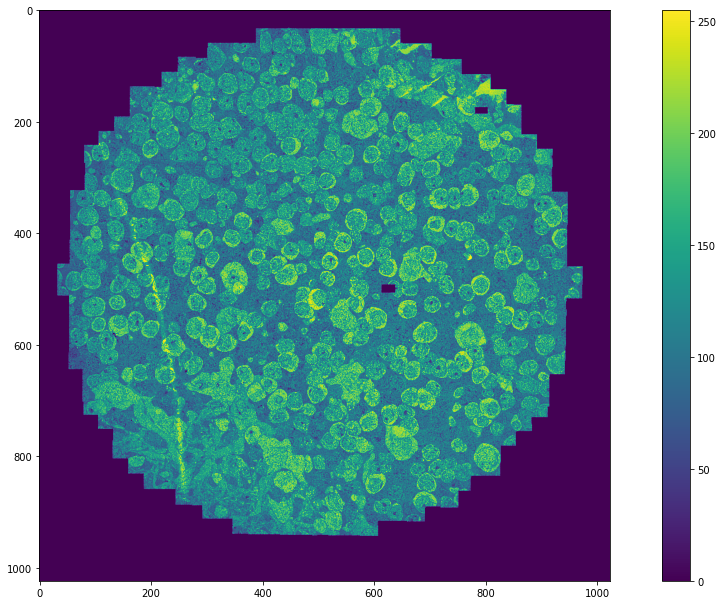

In [4]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice = RabbitRetinaEM.getXYSlice(resolution = -7,resample_output=False)
xSlice,ySlice = slice.shape
print("Slice dimensions=",xSlice,ySlice)
im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

In [5]:
print("Slice horizontal dim=",slice.shape[1],"Slice vertical dim=",slice.shape[0])

Slice horizontal dim= 1024 Slice vertical dim= 1024


# <center> Mark the area of interest in the slice

box= 60536 66536 63536 69536
box= 472.9375 519.8125 496.375 543.25


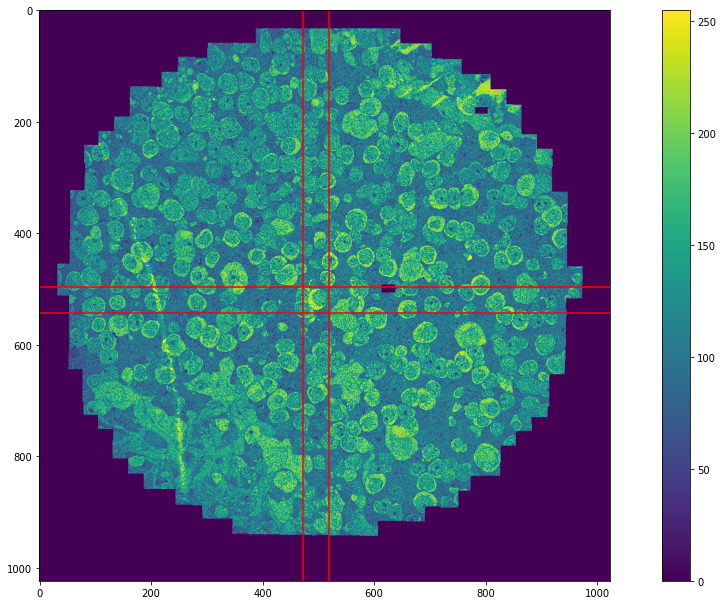

In [6]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice_size = X2-X1

# Parameters of the area of extract
x_size = 6000
y_size = 6000
x_min = slice_size//2 -5000
y_min = slice_size//2 -2000
x_max = x_min + x_size 
y_max = y_min + y_size 

scalingFactor = xSlice /slice_size
xx_min = x_min * scalingFactor
xx_max = x_max * scalingFactor 
yy_min = y_min * scalingFactor 
yy_max = y_max * scalingFactor 
print("box=",x_min,x_max,y_min,y_max)
print("box=",xx_min,xx_max,yy_min,yy_max)

slice = RabbitRetinaEM.getXYSlice(resolution = -7,resample_output=False)

plt.plot([0, 1024], [yy_min, yy_min], color = 'r')
plt.plot([0, 1024], [yy_max, yy_max], color = 'r')
plt.plot([xx_min, xx_min],[0, 1024],  color = 'r')
plt.plot([xx_max, xx_max],[0, 1024],  color = 'r')

im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

# <center> Extract and show the area of interest

Slice dimensions= 750 750


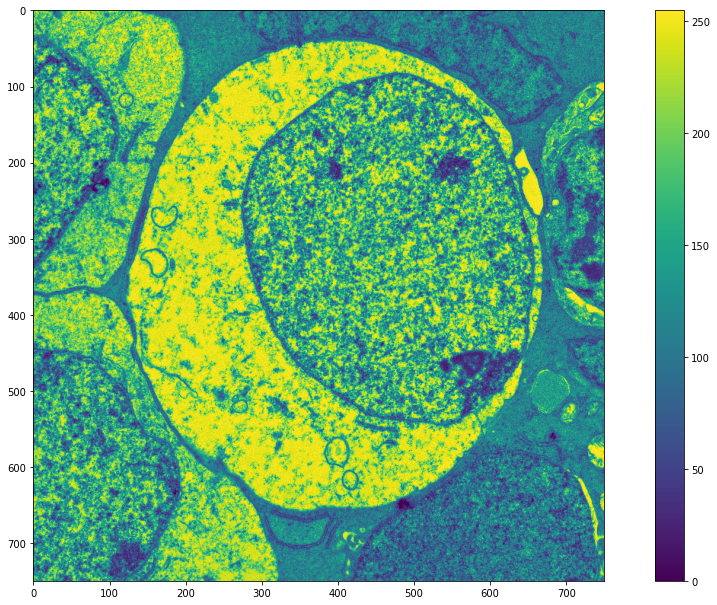

In [7]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

areaOfInterest = RabbitRetinaEM.getXYSlice(XY_MinMax=(x_min, x_max, y_min, y_max),time=1,resolution = -3,resample_output=False)
xAreaOfInterest,yAreaOfInterest = areaOfInterest.shape
print("Slice dimensions=",xAreaOfInterest,yAreaOfInterest)

im = plots.imshow(areaOfInterest) 
plt.colorbar(im)
plt.show()

---------------------------
Copyright (c) 2021 **Valerio Pascucci & Giorgio Scorzelli** 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

**The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.** 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.